In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/double_barbell/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().barbell()

X.shape =  (10227, 2)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=5, ddX=ddX, max_iter0=15, tau=90, N=200,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

Doubling manifold
No. of points on the boundary = 764
Doubled manifold
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 4922 points processed...
A_k, Atilde_k: 9844 points processed...
A_k, Atilde_k: 14766 points processed...
A_k, Atilde_k: 19688 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 4922 points processed...
local_param: 9844 points processed...
local_param: 14766 points processed...
local_param: 19688 points processed...
local_param: all 19690 points processed...
After iter 1, max distortion is 4.752088
After iter 2, max distortion is 4.113866
After iter 3, max distortion is 4.113866
After iter 4, max distortion is 4.113866
After iter 5, max distortion is 4.113866
After iter 6, max distortion is 4.113866
Max local distortion = 4.111742200581165
###############
Took 339.1 seconds to perform step 1: construct low distoriton local views
###############

Clus

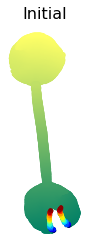

###############
Took 20.9 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.0008831987436189387


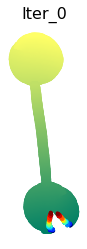

Iteration: 1
error: 0.0007867025331298839
Iteration: 2
error: 0.000787482824006142
Iteration: 3
error: 0.0007509708708307836
Iteration: 4
error: 0.0007171797564192065
Iteration: 5
error: 0.0006635381268563696


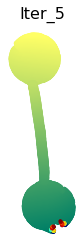

Iteration: 6
error: 0.0006103240277989803
Iteration: 7
error: 0.0004897712542073573
Iteration: 8
error: 0.0004714695645921664
Iteration: 9
error: 0.00046548762454298053
Iteration: 10
error: 0.0004620340153022459


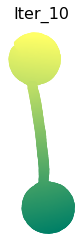

Iteration: 11
error: 0.00045963961938205966
Iteration: 12
error: 0.0004577450543137225
Iteration: 13
error: 0.00045625755900050794
Iteration: 14
error: 0.00045493059522530517


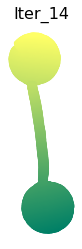

###############
Took 524.1 seconds to refine global embedding.
###############
###############
Took 551.7 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)